# Creating Plots on Data Aware Grids

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/college_datav3.csv')

In [3]:
df.head()

,INSTNM,OPEID,REGION,SAT_AVG_ALL,PCTPELL,PCTFLOAN,ADM_RATE_ALL,UG,AVGFACSAL,COMPL_RPY_5YR_RT,...,CONTROL,WOMENONLY,MENONLY,LOCALE,Tuition,Degree_Type,Ownership,Regions,Locales,Locale_Short
0,Alabama A & M University,100200,5,850.0,0.7249,0.8159,0.653841,4380.0,7017.0,0.477631579,...,1,0.0,0.0,12.0,13435.0,Graduate,Public,South East,City: Midsize,City
1,University of Alabama at Birmingham,105200,5,1147.0,0.3505,0.5218,0.604275,10331.0,10221.0,0.673230442,...,1,0.0,0.0,12.0,16023.0,Graduate,Public,South East,City: Midsize,City
2,Amridge University,2503400,5,NaN,0.7455,0.8781,NaN,98.0,3217.0,0.636363636,...,2,0.0,0.0,12.0,8862.0,Graduate,Private non-profit,South East,City: Midsize,City
3,University of Alabama in Huntsville,105500,5,1221.0,0.3179,0.4589,0.811971,5220.0,9514.0,0.762222222,...,1,0.0,0.0,12.0,18661.0,Graduate,Public,South East,City: Midsize,City
4,Alabama State University,100500,5,844.0,0.7567,0.7692,0.463858,4348.0,7940.0,0.43006993,...,1,0.0,0.0,12.0,7400.0,Graduate,Public,South East,City: Midsize,City


In [4]:
df.columns

Index(['INSTNM', 'OPEID', 'REGION', 'SAT_AVG_ALL', 'PCTPELL', 'PCTFLOAN',
       'ADM_RATE_ALL', 'UG', 'AVGFACSAL', 'COMPL_RPY_5YR_RT', 'DEBT_MDN',
       'MEDIAN_HH_INC', 'ICLEVEL', 'HIGHDEG', 'CONTROL', 'WOMENONLY',
       'MENONLY', 'LOCALE', 'Tuition', 'Degree_Type', 'Ownership', 'Regions',
       'Locales', 'Locale_Short'],
      dtype='object')

## Building a FacetGrid

Seaborn's `FacetGrid` is the foundation for building data-aware grids. A data-aware grid allows you to create a series of small plots that can be useful for understanding complex data relationships.

/Users/jacobjohn/Codes/cs-notes/.venv/lib/python3.8/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


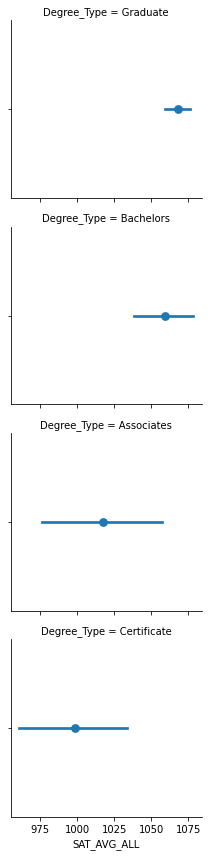

<Figure size 432x288 with 0 Axes>

In [5]:
# Create FacetGrid with Degree_Type and specify the order of the rows using row_order
g2 = sns.FacetGrid(df,
                   row="Degree_Type",
                   row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

# Map a pointplot of SAT_AVG_ALL onto the grid
g2.map(sns.pointplot, 'SAT_AVG_ALL')

# Show the plot
plt.show()
plt.clf()

## References

1. https://stats.stackexchange.com/questions/85560/shape-of-confidence-interval-for-predicted-values-in-linear-regression

## Using a factorplot

In many cases, Seaborn's `factorplot()` can be a simpler way to create a `FacetGrid`. Instead of creating a grid and mapping the plot, we can use the `factorplot()` to create a plot with one line of code.

/Users/jacobjohn/Codes/cs-notes/.venv/lib/python3.8/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


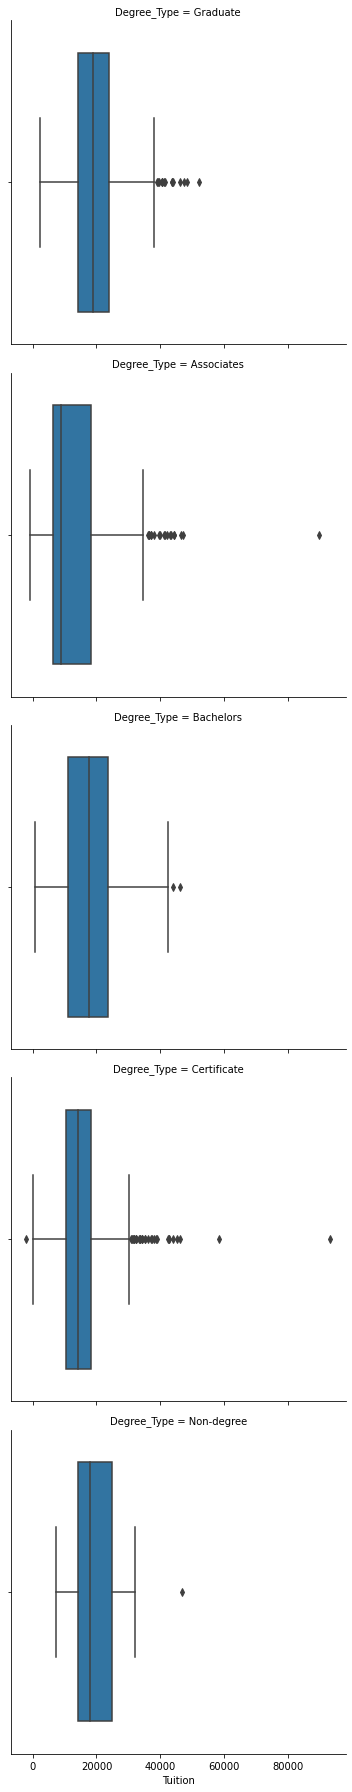

<Figure size 432x288 with 0 Axes>

In [6]:
# Create a factor plot that contains boxplots of Tuition values
sns.factorplot(data=df,
               x='Tuition',
               kind='box',
               row='Degree_Type')

plt.show()
plt.clf()

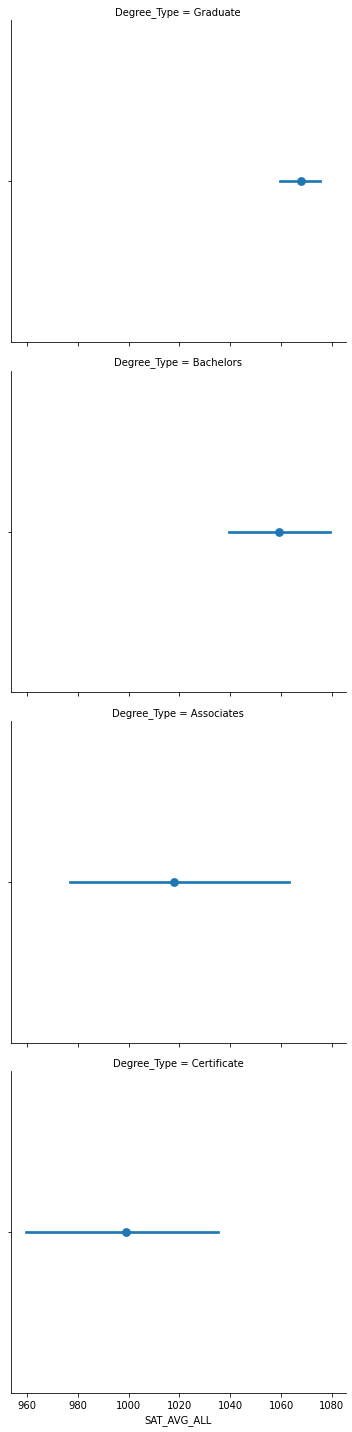

<Figure size 432x288 with 0 Axes>

In [7]:
# Create a facetted pointplot of Average SAT_AVG_ALL scores facetted by Degree Type
sns.catplot(data=df,
            x='SAT_AVG_ALL',
            kind='point',
            row='Degree_Type',
            row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

plt.show()
plt.clf()

**NOTE**: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

## Using a lmplot

The `lmplot` is used to plot scatter plots with regression lines on FacetGrid objects. The API is similar to factorplot with the difference that the default behavior of lmplot is to plot regression lines.

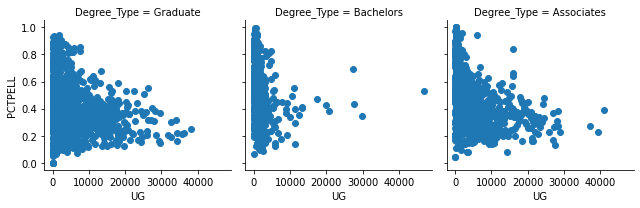

<Figure size 432x288 with 0 Axes>

In [8]:
degree_ord = ['Graduate', 'Bachelors', 'Associates']

# Create a FacetGrid varying by column and columns ordered with the degree_order variable
g = sns.FacetGrid(df, col="Degree_Type", col_order=degree_ord)

# Map a scatter plot of Undergrad Population compared to PCTPELL
g.map(plt.scatter, 'UG', 'PCTPELL')

plt.show()
plt.clf()

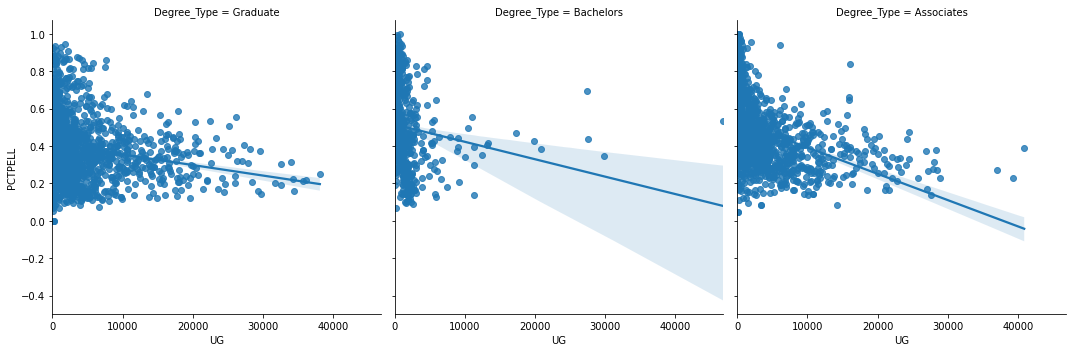

<Figure size 432x288 with 0 Axes>

In [9]:
# Re-create the plot above as an lmplot
sns.lmplot(data=df,
           x='UG',
           y='PCTPELL',
           col="Degree_Type",
           col_order=degree_ord)

plt.show()
plt.clf()

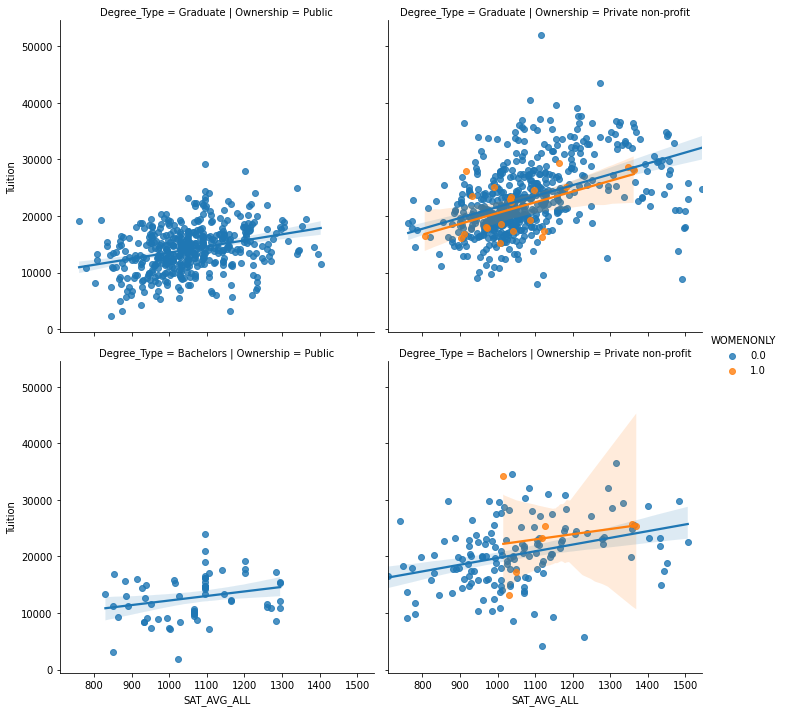

<Figure size 432x288 with 0 Axes>

In [10]:
inst_ord = ['Public', 'Private non-profit']

# Create an lmplot that has a column for Ownership, a row for Degree_Type and hue based on the WOMENONLY column
sns.lmplot(data=df,
           x='SAT_AVG_ALL',
           y='Tuition',
           col="Ownership",
           row='Degree_Type',
           row_order=['Graduate', 'Bachelors'],
           hue='WOMENONLY',
           col_order=inst_ord)

plt.show()
plt.clf()

## Building a PairGrid

When exploring a dataset, one of the earliest tasks is exploring the relationship between pairs of variables. This step is normally a precursor to additional investigation.

Seaborn supports this pair-wise analysis using the `PairGrid`

In [11]:
df = pd.read_csv('data/insurance_premiums.csv')

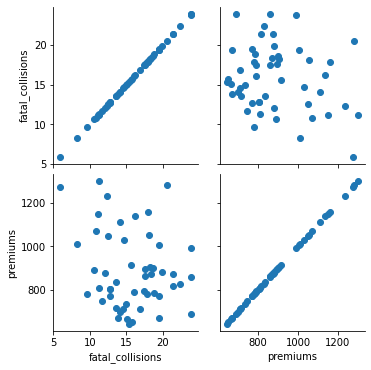

<Figure size 432x288 with 0 Axes>

In [12]:
# Create a PairGrid with a scatter plot for fatal_collisions and premiums
g = sns.PairGrid(df, vars=["fatal_collisions", "premiums"])
g2 = g.map(plt.scatter)

plt.show()
plt.clf()

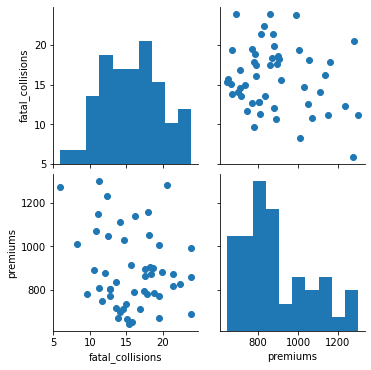

<Figure size 432x288 with 0 Axes>

In [13]:
# Create the same PairGrid but map a histogram on the diag
g = sns.PairGrid(df, vars=["fatal_collisions", "premiums"])
g2 = g.map_diag(plt.hist)
g3 = g2.map_offdiag(plt.scatter)

plt.show()
plt.clf()

## Using a pairplot
The `pairplot()` function is generally a more convenient way to look at pairwise relationships.

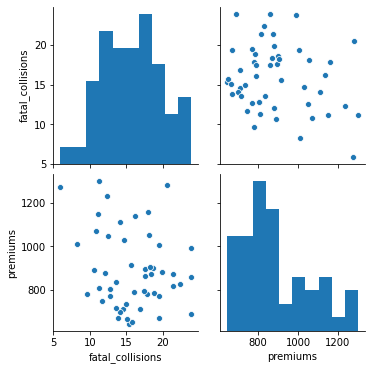

<Figure size 432x288 with 0 Axes>

In [14]:
# Create a pairwise plot of the variables using a scatter plot
sns.pairplot(data=df,
             vars=["fatal_collisions", "premiums"],
             kind='scatter')

plt.show()
plt.clf()

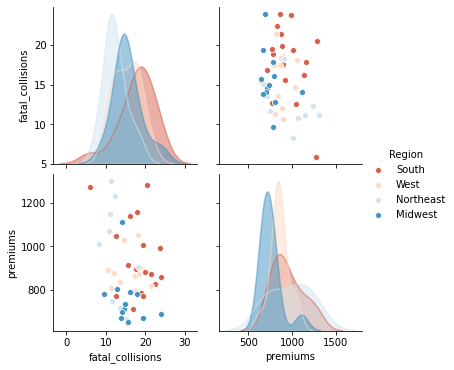

<Figure size 432x288 with 0 Axes>

In [15]:
# Plot the same data but use a different color palette and color code by Region
sns.pairplot(data=df,
             vars=["fatal_collisions", "premiums"],
             kind='scatter',
             hue='Region',
             palette='RdBu',
             diag_kws={'alpha': .5})

plt.show()
plt.clf()

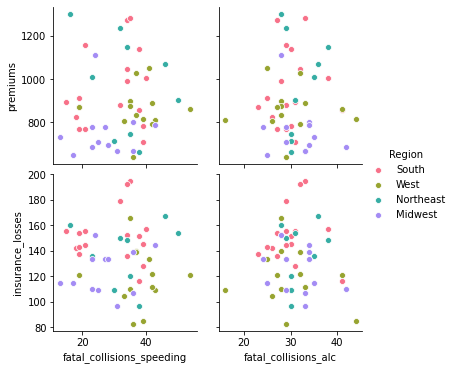

<Figure size 432x288 with 0 Axes>

In [16]:
# Build a pairplot with different x and y variables
sns.pairplot(data=df,
             x_vars=["fatal_collisions_speeding", "fatal_collisions_alc"],
             y_vars=['premiums', 'insurance_losses'],
             kind='scatter',
             hue='Region',
             palette='husl')

plt.show()
plt.clf()

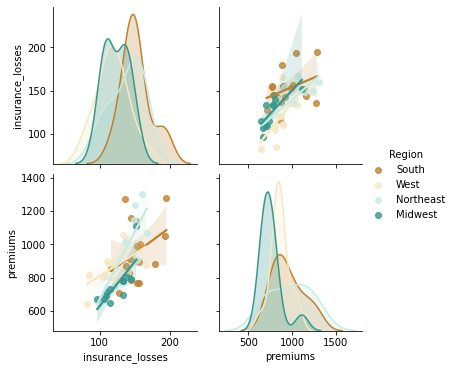

<Figure size 432x288 with 0 Axes>

In [17]:
# plot relationships between insurance_losses and premiums
sns.pairplot(data=df,
             vars=["insurance_losses", "premiums"],
             kind='reg',
             palette='BrBG',
             diag_kind= 'kde',
             hue='Region')

plt.show()
plt.clf()

## JointGrid and jointplot

Seaborn's `JointGrid` combines univariate plots such as histograms, rug plots and kde plots with bivariate plots such as scatter and regression plots.

In [18]:
df = pd.read_csv('data/bike_share.csv')

In [19]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_rentals
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


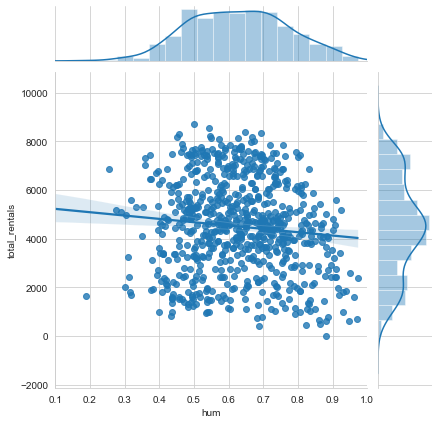

<Figure size 432x288 with 0 Axes>

In [20]:
# Build a JointGrid comparing humidity and total_rentals
sns.set_style("whitegrid")
g = sns.JointGrid(x="hum",
                  y="total_rentals",
                  data=df,
                  xlim=(0.1, 1.0))

g.plot(sns.regplot, sns.distplot)

plt.show()
plt.clf()

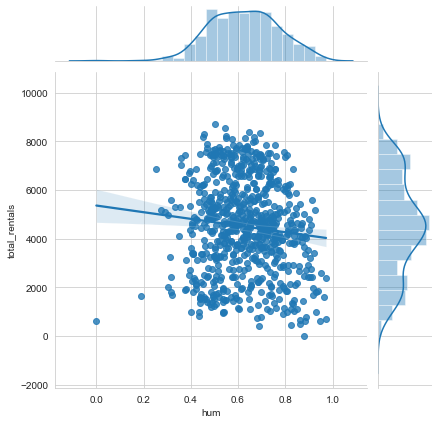

<Figure size 432x288 with 0 Axes>

In [21]:
# Create a jointplot similar to the JointGrid
sns.jointplot(x="hum",
              y="total_rentals",
              kind='reg',
              data=df)

plt.show()
plt.clf()

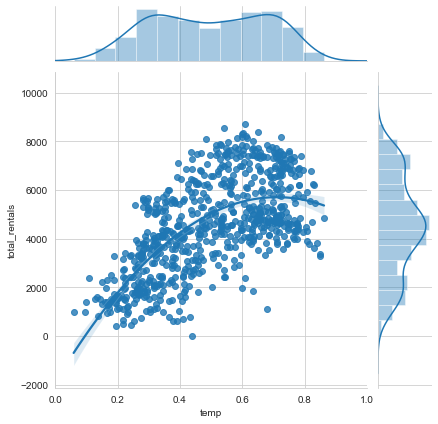

<Figure size 432x288 with 0 Axes>

In [22]:
# Plot temp vs. total_rentals as a regression plot
sns.jointplot(x="temp",
              y="total_rentals",
              kind='reg',
              data=df,
              order=2,
              xlim=(0, 1))

plt.show()
plt.clf()

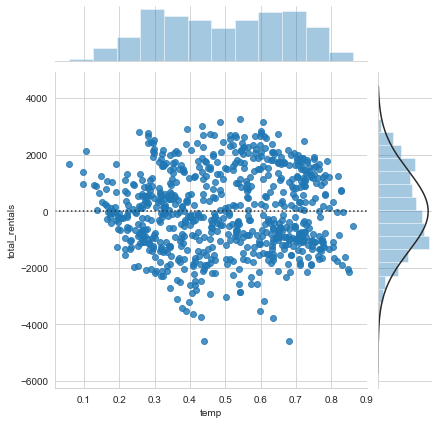

<Figure size 432x288 with 0 Axes>

In [23]:
# Plot a jointplot showing the residuals
sns.jointplot(x="temp",
              y="total_rentals",
              kind='resid',
              data=df,
              order=2)

plt.show()
plt.clf()

Based on the residual plot and the pearson r value, there is a positive relationship between temperature and total_rentals.

## Complex jointplots
The `jointplot` is a convenience wrapper around many of the `JointGrid` functions. However, it is possible to overlay some of the `JointGrid` plots on top of the standard `jointplot`

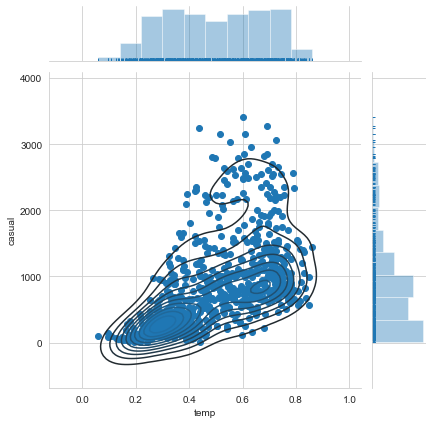

<Figure size 432x288 with 0 Axes>

In [24]:
# Create a jointplot of temp vs. casual riders
# Include a kdeplot over the scatter plot
g = (sns.jointplot(x="temp",
                   y="casual",
                   kind='scatter',
                   data=df,
                   marginal_kws=dict(bins=10, rug=True))
     .plot_joint(sns.kdeplot))

plt.show()
plt.clf()

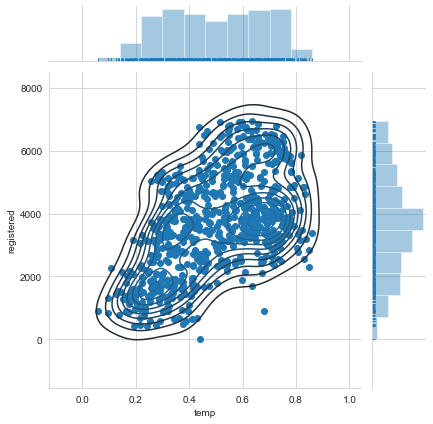

<Figure size 432x288 with 0 Axes>

In [25]:
# Replicate the above plot but only for registered riders
g = (sns.jointplot(x="temp",
                   y="registered",
                   kind='scatter',
                   data=df,
                   marginal_kws=dict(bins=10, rug=True))
     .plot_joint(sns.kdeplot))

plt.show()
plt.clf()